In [6]:
# Predicting Boston housing prices

# Classifier
from sklearn.ensemble import AdaBoostClassifier

# Regressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# load data
data = load_boston()

# split the data
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)

# use AdaBoost Regressor
regressor = AdaBoostRegressor()
regressor.fit(train_x, train_y)
pred_y = regressor.predict(test_x)

mse = mean_squared_error(test_y, pred_y)

print('Predicting Price:', pred_y)
print('Mean square error = ', round(mse,2))

# use Dec Regressor
from sklearn.tree import DecisionTreeRegressor
dec_regressor = DecisionTreeRegressor()
dec_regressor.fit(train_x, train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print('Dec square error = ', round(mse, 2))

# use KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(train_x, train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print('KNN square error = ', round(mse,2))





Predicting Price: [18.29375    10.37121212 14.05714286 17.72926829 23.3558011  21.85658537
 28.07058824 17.80486486 29.24428571 18.69705882 29.311      33.32105263
 12.00441176 23.54647059 12.54074074 25.27647059 17.67236181 17.4
 27.9190184  23.54647059 17.67236181 18.10740741 17.80486486 18.82931034
 32.30714286 17.80486486 21.82704403 24.78967742 11.96944444 29.24428571
 17.67236181 26.29690722 10.37121212 20.86823529 26.29690722 29.92820513
 26.29690722 12.00441176 13.41884058 24.91496063 15.08709677 12.49393939
 29.22352941 17.67236181 27.28101266 18.46901408 17.80486486 18.445
 26.79375    19.04603175 17.72926829 33.32105263 15.31111111 17.64705882
 24.78967742 20.86823529 24.91496063 16.61666667 23.54647059 21.85658537
 18.21147541 16.17654321 44.88529412 20.78823529 17.67236181 26.79375
 25.27647059 11.22608696 17.80486486 28.07058824 21.85658537 18.05393258
 17.67236181 27.98246445 19.271      44.53174603 15.65090909 11.14102564
 17.78979592 23.54647059 20.528      14.96666667

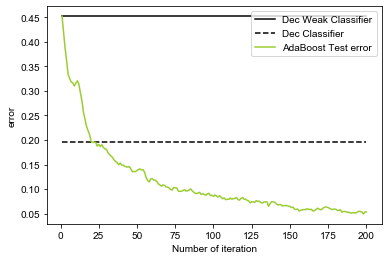

In [17]:
# Compare AdaBoost and Dec classifier model
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# set the number of AdaBoost iterations
n_estimators = 200

# use
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

# Take the first 2000 rows from the 12000 data as the test set, and the rest as the raining set
train_x, train_y = X[2000:], y[2000:]
test_x, test_y = X[:2000], y[:2000]

# Weak classifier
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)

# Dec classifier
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_err = 1.0-dt.score(test_x, test_y)

# AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator = dt_stump, n_estimators = n_estimators)
ada.fit(train_x, train_y)

# Visualization of the error rate of the three classifiers
fig = plt.figure()

# set chinese
plt.rcParams['font.sans-serif']  = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
ax = fig.add_subplot(111)
ax.plot([1, n_estimators], [dt_stump_err] *2, 'k-', label='Dec Weak Classifier')
ax.plot([1, n_estimators], [dt_err]*2, 'k--', label='Dec Classifier')
ada_err = np.zeros((n_estimators))

# Traverse the results of each iteration, 'i' is the number of iterations, 'pred_y' is the predicted result
for i, pred_y in enumerate(ada.staged_predict(test_x)):
    # sum the error rate
    ada_err[i]  = zero_one_loss(pred_y, test_y)

# draw evey iteration, AdaBoost error
ax.plot(np.arange(n_estimators) +1, ada_err, label='AdaBoost Test error', color = 'yellowgreen')
ax.set_xlabel('Number of iteration')
ax.set_ylabel('error')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()
